In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('london_crime_by_lsoa.csv')

In [3]:
df.shape

(13490604, 7)

## Getting to Know Data

In [4]:
df.head()

,lsoa_code,borough,major_category,minor_category,value,year,month
0,E01001116,Croydon,Burglary,Burglary in Other Buildings,0,2016,11
1,E01001646,Greenwich,Violence Against the Person,Other violence,0,2016,11
2,E01000677,Bromley,Violence Against the Person,Other violence,0,2015,5
3,E01003774,Redbridge,Burglary,Burglary in Other Buildings,0,2016,3
4,E01004563,Wandsworth,Robbery,Personal Property,0,2008,6


In [5]:
df.isnull().values.any()

False

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13490604 entries, 0 to 13490603
Data columns (total 7 columns):
 #   Column          Dtype 
---  ------          ----- 
 0   lsoa_code       object
 1   borough         object
 2   major_category  object
 3   minor_category  object
 4   value           int64 
 5   year            int64 
 6   month           int64 
dtypes: int64(3), object(4)
memory usage: 720.5+ MB


In [7]:
df.index.values

array([       0,        1,        2, ..., 13490601, 13490602, 13490603],
      dtype=int64)

## Exploring Dataset

Memisahkan data dengan 0 value crime

In [8]:
df_not_null = df[df["value"] != 0]

In [9]:
df_not_null

,lsoa_code,borough,major_category,minor_category,value,year,month
9,E01004177,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,1,2016,8
16,E01000086,Barking and Dagenham,Theft and Handling,Other Theft Person,1,2009,5
24,E01001301,Ealing,Theft and Handling,Other Theft Person,2,2012,1
25,E01001794,Hackney,Violence Against the Person,Harassment,1,2013,2
32,E01000733,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,1,2016,4
...,...,...,...,...,...,...,...
13490581,E01000789,Bromley,Violence Against the Person,Harassment,3,2009,12
13490584,E01003301,Lewisham,Violence Against the Person,Assault with Injury,1,2015,10
13490590,E01001679,Greenwich,Theft and Handling,Theft/Taking Of Motor Vehicle,1,2012,4
13490592,E01033327,Lewisham,Violence Against the Person,Common Assault,2,2013,7


In [10]:
df_not_null.describe()

,value,year,month
count,3.419099e+06,3.419099e+06,3.419099e+06
mean,1.885806e+00,2.011991e+03,6.511021e+00
std,3.118902e+00,2.602550e+00,3.422459e+00
min,1.000000e+00,2.008000e+03,1.000000e+00
25%,1.000000e+00,2.010000e+03,4.000000e+00
50%,1.000000e+00,2.012000e+03,7.000000e+00
75%,2.000000e+00,2.014000e+03,9.000000e+00
max,3.090000e+02,2.016000e+03,1.200000e+01


melihat data tertinggi dari setiap label pada dataset

In [11]:
df_not_null["lsoa_code"].value_counts()

E01004734    2387
E01004763    2350
E01001043    2156
E01004736    2153
E01002968    2097
             ... 
E01000005     109
E01032775      73
E01000002      46
E01000001      32
E01000003      26
Name: lsoa_code, Length: 4835, dtype: int64

In [12]:
df_not_null["borough"].value_counts()

Lambeth                   152784
Croydon                   147203
Southwark                 144362
Ealing                    140006
Newham                    137275
Brent                     129925
Lewisham                  128232
Barnet                    127194
Tower Hamlets             120099
Wandsworth                118995
Enfield                   117953
Hackney                   116521
Haringey                  116315
Waltham Forest            114603
Camden                    112029
Islington                 111755
Hillingdon                110614
Westminster               110070
Bromley                   109855
Hounslow                  106561
Redbridge                 105932
Greenwich                 104654
Hammersmith and Fulham     92084
Barking and Dagenham       86849
Havering                   82288
Kensington and Chelsea     81295
Harrow                     73993
Bexley                     73948
Merton                     73661
Sutton                     62776
Richmond u

In [13]:
df_not_null["major_category"].value_counts()

Theft and Handling             1136994
Violence Against the Person     894859
Criminal Damage                 466268
Burglary                        441209
Drugs                           231894
Robbery                         163549
Other Notifiable Offences        80569
Fraud or Forgery                  2682
Sexual Offences                   1075
Name: major_category, dtype: int64

In [14]:
df_not_null["minor_category"].value_counts()

Other Theft                               297281
Theft From Motor Vehicle                  291839
Burglary in a Dwelling                    278792
Assault with Injury                       244990
Harassment                                243827
Common Assault                            231398
Possession Of Drugs                       201464
Criminal Damage To Motor Vehicle          179380
Theft/Taking Of Motor Vehicle             163069
Burglary in Other Buildings               162417
Personal Property                         144078
Other Theft Person                        121674
Criminal Damage To Dwelling               121592
Other Criminal Damage                     112449
Theft/Taking of Pedal Cycle               104947
Theft From Shops                           94947
Wounding/GBH                               90482
Other Notifiable                           75483
Criminal Damage To Other Building          52847
Other violence                             50620
Motor Vehicle Interf

In [15]:
df_not_null["year"].value_counts()

2016    392042
2008    391242
2009    383008
2015    381859
2010    379349
2011    378814
2012    377721
2014    370384
2013    364680
Name: year, dtype: int64

In [16]:
df_not_null["month"].value_counts()

7     296151
5     293112
10    293086
6     292346
3     288797
11    286886
8     284054
9     282619
4     280792
1     279966
12    271442
2     269848
Name: month, dtype: int64

Dari perhitungan setiap label dataset di atas menghasilkan kesimpulan sebagai berikut:
- Pada label **lsoa_code** atau area polisi, kode E01004734 menjadi area polisi yang banyak ditempatkan yaitu Westminster yang merupakan area pemerintahan yang ramai di dekat Istana Buckingham
- kota **Lambeth** menjadi kota dengan tingkat kriminalitas tertinggi dan kota **City of London** merupakan kota dengan tingkat kriminalitas terendah
- Pada label **major_category** Theft and Handling merupakan kriminalitas yang paling sering terjadi sedangkan Sexual Offences kriminalitas yang tidak sering terjadi
- Pada label **minor_category** Other Thief merupakan kriminalitas yang paling sering terjadi sedangkan rape merupakan kriminalitas minor yang tidak sering terjadi
- Pada label **year** tindak kriminalitas tertinggi terjadi pada tahun 2016 dan terendah pada tahun 2013
-  **Juli** merupakan bulan dengan tingkat kriminalitas tertinggi sedangkan **Februari** merupakan bulan dengan tingkat kriminalitas terendah

## Querying Dataset

Berapakah perubahan jumlah kejadian kejahatan dari tahun 2013 ke tahun 2016?

**Mendapatkan informasi data major_category yang terjadi disetiap wilayah  pada tahun 2013 sampai 2016**

In [17]:
borough_major_category = df_not_null[["borough","major_category"]][df_not_null.year >= 2013].value_counts(ascending=False)
borough_major_category

borough         major_category             
Lambeth         Theft and Handling             22490
Southwark       Theft and Handling             21676
Wandsworth      Theft and Handling             20321
Lambeth         Violence Against the Person    19831
Croydon         Violence Against the Person    19181
                                               ...  
City of London  Drugs                             21
                Robbery                           14
                Criminal Damage                   12
                Other Notifiable Offences         10
                Burglary                           9
Length: 231, dtype: int64

**Mendapatkan informasi data minor_category yang terjadi disetiap wilayah  pada tahun 2013 sampai 2016**

In [18]:
borough_minor_category = df_not_null[["borough","minor_category"]][df_not_null.year >= 2013].value_counts(ascending=False)
borough_minor_category

borough               minor_category          
Barnet                Burglary in a Dwelling      6021
Lambeth               Other Theft                 5866
Southwark             Other Theft                 5473
Barnet                Theft From Motor Vehicle    5465
Croydon               Other Theft                 5430
                                                  ... 
Hounslow              Murder                         3
Bromley               Murder                         3
Sutton                Murder                         2
City of London        Offensive Weapon               2
Richmond upon Thames  Other Drugs                    1
Length: 917, dtype: int64

Mengabungkan data major_category dan minor_category yang terjadi pada tahun 2013 sampai 2016

In [19]:
df_crime_2013_2016 = df_not_null[["borough", "major_category", "minor_category", "year", "month", "value"]][df_not_null.year >= 2013]
df_crime_2013_2016

,borough,major_category,minor_category,year,month,value
9,Sutton,Theft and Handling,Theft/Taking of Pedal Cycle,2016,8,1
25,Hackney,Violence Against the Person,Harassment,2013,2,1
32,Bromley,Criminal Damage,Criminal Damage To Motor Vehicle,2016,4,1
43,Croydon,Theft and Handling,Other Theft,2014,5,1
57,Hounslow,Violence Against the Person,Wounding/GBH,2015,8,2
...,...,...,...,...,...,...
13490572,Greenwich,Criminal Damage,Criminal Damage To Motor Vehicle,2013,8,1
13490580,Lambeth,Burglary,Burglary in a Dwelling,2015,10,3
13490584,Lewisham,Violence Against the Person,Assault with Injury,2015,10,1
13490592,Lewisham,Violence Against the Person,Common Assault,2013,7,2


## Line Pots

In [20]:
df_major_crime = df_crime_2013_2016.groupby(["major_category", "year"]).sum()["value"].sort_values(ascending=False) 
df_major_crime

major_category               year
Theft and Handling           2013    306372
                             2016    294133
                             2015    284022
                             2014    279880
Violence Against the Person  2016    232381
                             2015    218740
                             2014    185349
                             2013    146181
Burglary                     2013     87222
                             2014     76053
                             2015     70489
                             2016     68285
Criminal Damage              2016     64071
                             2015     62976
                             2014     59279
                             2013     56206
Drugs                        2013     50278
                             2014     44435
                             2015     39785
                             2016     38914
Robbery                      2013     29337
                             2016     2252

In [21]:
df_major_crime_trans = df_major_crime.unstack().T
df_major_crime_trans

major_category,Burglary,Criminal Damage,Drugs,Other Notifiable Offences,Robbery,Theft and Handling,Violence Against the Person
year,,,,,,,
2013,87222,56206,50278,10811,29337,306372,146181
2014,76053,59279,44435,13037,22150,279880,185349
2015,70489,62976,39785,14229,21383,284022,218740
2016,68285,64071,38914,15809,22528,294133,232381


In [22]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

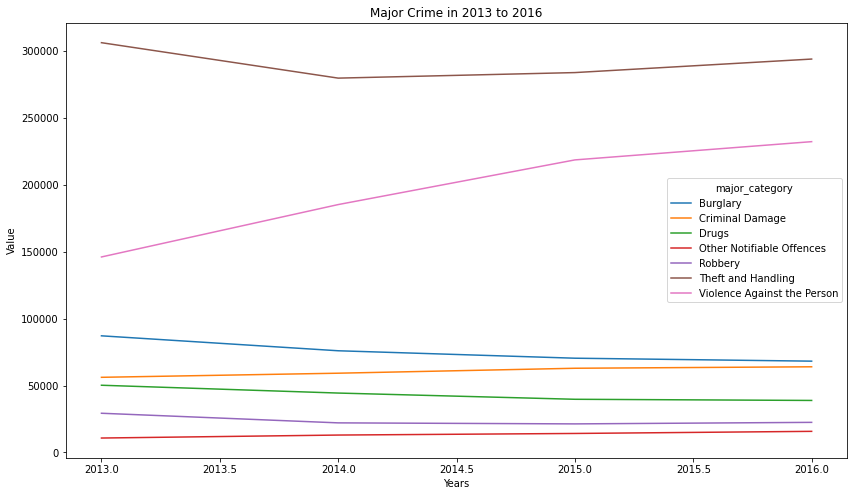

In [23]:

df_major_crime_trans.plot (kind='line', figsize=(14,8))

plt.title('Major Crime in 2013 to 2016')
plt.ylabel('Value')
plt.xlabel('Years')

plt.show()

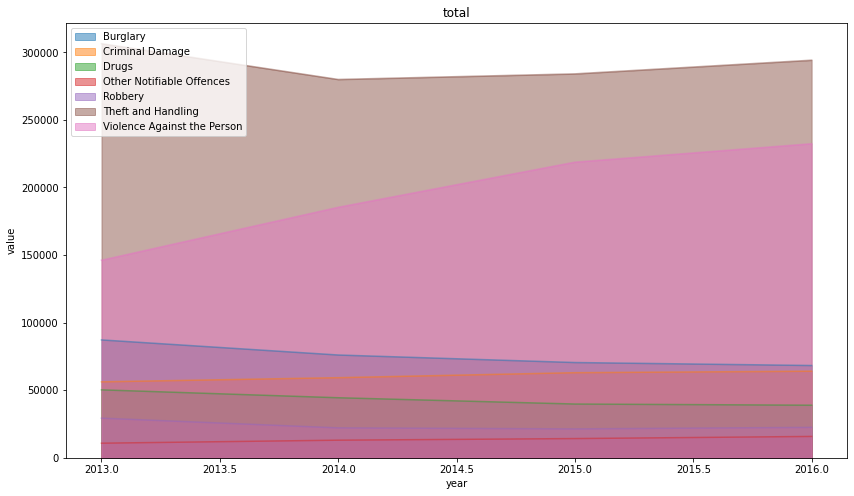

In [24]:
fig, ax = plt.subplots(figsize=(14,8))
df_major_crime_trans.plot(kind="area",ax=ax,stacked=False)

plt.title('total') # add a title to the area plot
plt.ylabel('value') # add y-label
plt.xlabel('year') # add x-label

plt.legend(loc='upper left')

plt.show()

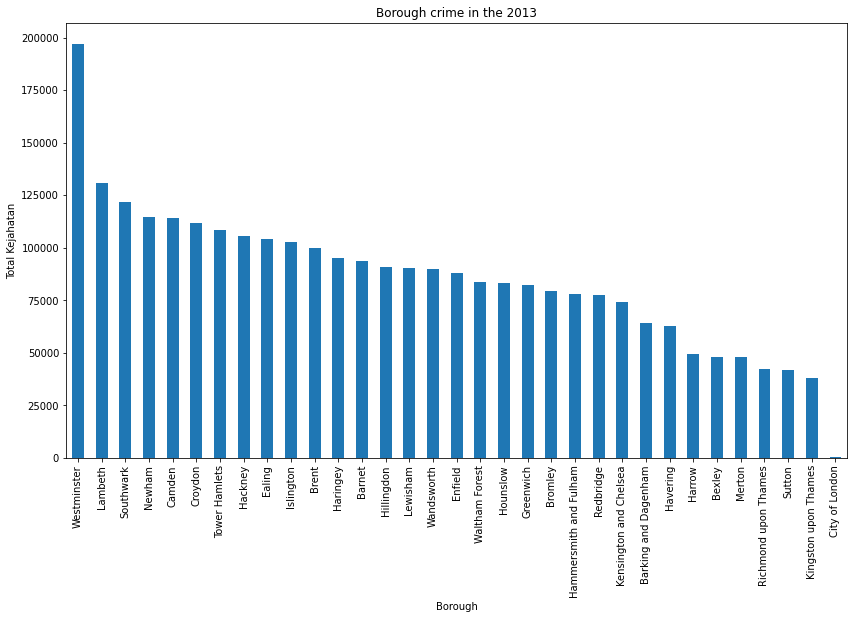

In [25]:
df_area = df_crime_2013_2016.groupby(['borough']).sum()['value'].sort_values(ascending=False)
df_area.plot(kind='bar', figsize=(14,8))

# Set axis to the graphs
plt.title("Borough crime in the 2013") # add a title to the area plot
plt.ylabel('Total Kejahatan') # add y-label
plt.xlabel('Borough') # add x-label

plt.show()

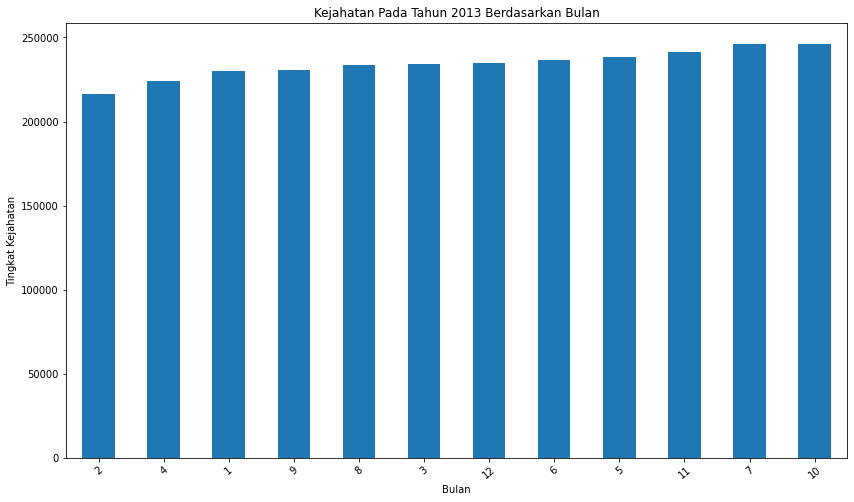

In [26]:
df_maj = df_crime_2013_2016.groupby(['month']).sum()['value'].sort_values(ascending=True)

df_maj.plot(kind="bar", figsize=(14,8))
plt.xticks(rotation=40)
plt.title("Kejahatan Pada Tahun 2013 Berdasarkan Bulan") # add a title to the area plot
plt.ylabel("Tingkat Kejahatan") # add y-label
plt.xlabel("Bulan") # add x-label

plt.show()

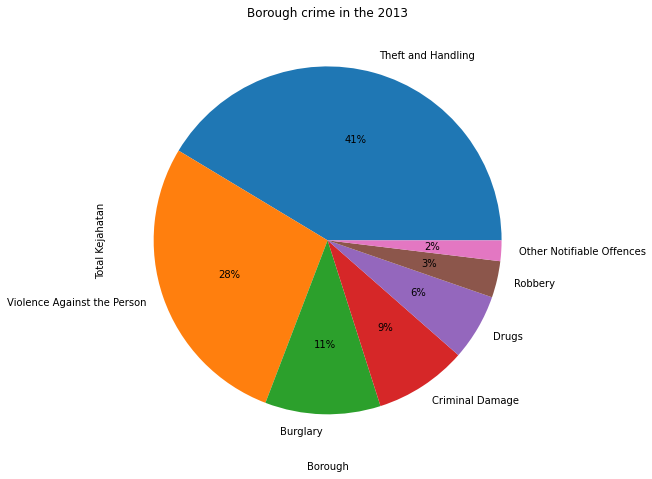

In [27]:
df_area = df_crime_2013_2016.groupby(['major_category']).sum()['value'].sort_values(ascending=False)
df_area.plot(kind='pie', figsize=(14,8), autopct='%1.0f%%')

# Set axis to the graphs
plt.title("Borough crime in the 2013") # add a title to the area plot
plt.ylabel('Total Kejahatan') # add y-label
plt.xlabel('Borough') # add x-label

plt.show()

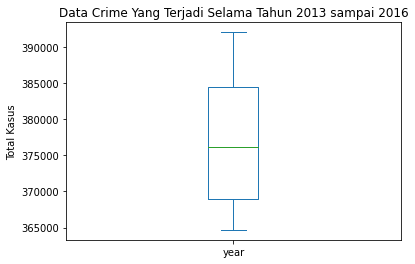

In [28]:
df_crime_2013_2016.year.value_counts().plot(kind='box')

plt.title('Data Crime Yang Terjadi Selama Tahun 2013 sampai 2016') # add a title to the area plot
plt.ylabel('Total Kasus') # add y-label
plt.show()

In [29]:
df_crime_2013_2016_month_value = df_crime_2013_2016.copy()

In [30]:
df_crime_2013_2016_month_value.drop(["borough", "major_category", "minor_category", "year", "value"], axis=1, inplace=True)
df_crime_2013_2016_month_value

,month
9,8
25,2
32,4
43,5
57,8
...,...
13490572,8
13490580,10
13490584,10
13490592,7


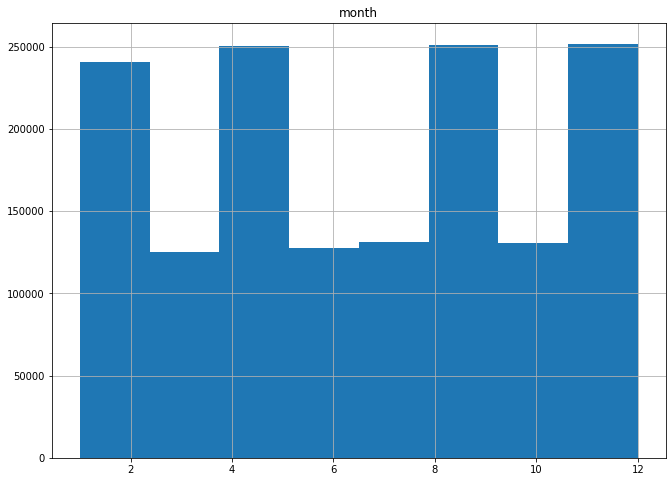

In [31]:
fig = plt.figure(figsize = (11,8))
ax = fig.gca()
df_crime_2013_2016_month_value.hist(ax=ax,bins=8)
plt.show()

In [32]:
df_month = df_crime_2013_2016.groupby(['month']).sum()['value']
df_month

month
1     230350
2     216506
3     234522
4     224227
5     238120
6     236900
7     246197
8     233830
9     230833
10    246259
11    241522
12    235069
Name: value, dtype: int64

Text(0, 0.5, 'Number of Criminals')

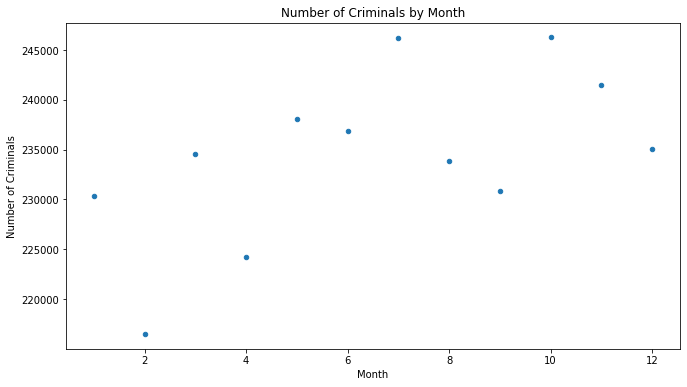

In [33]:
pd.DataFrame(df_month).reset_index().plot(kind='scatter',x='month',y='value', figsize=(11, 6))
plt.title('Number of Criminals by Month')
plt.xlabel('Month')
plt.ylabel('Number of Criminals')

In [34]:
import folium

In [36]:
latitude = 51.509865
longitude = -0.118092

In [37]:
london_map = folium.Map(location=[latitude, longitude], zoom_start=13)
london_map